### Step 1: Include libraries

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas # data processing, CSV file I/O (e.g. pd.read_csv)
import random

from pathlib import Path
from roboflow import Roboflow
from PIL import Image 
import shutil

# INSTALL YOLO
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import os
HOME = os.getcwd()
print(HOME)


Ultralytics YOLOv8.0.20  Python-3.9.0 torch-2.0.0+cpu CPU
Setup complete  (6 CPUs, 15.9 GB RAM, 1841.9/1863.0 GB disk)


e:\KAIMGRAUATIONPROJECT


### Step 2: Prepare the SKU110K dataset

In [ ]:
train = pd.read_csv("SKU110k_Dataset\\SKU110K_fixed\\annotations\\annotations_train.csv", header=None,)
test = pd.read_csv("SKU110k_Dataset\\SKU110K_fixed\\annotations\\annotations_test.csv", header=None,)
val = pd.read_csv("SKU110k_Dataset\\SKU110K_fixed\\annotations\\annotations_val.csv", header=None,)


## Data in the form of: image_name,x1,y1,x2,y2,classifcation,image_width,image_height
#### X1, y1 = top left coordinates
#### x2, y2 = Bottom right coordinates

In [ ]:
train.head()

,0,1,2,3,4,5,6,7
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024


In [ ]:
test.head()

,0,1,2,3,4,5,6,7
0,test_0.jpg,120,2527,225,2764,object,2448,3264
1,test_0.jpg,727,2269,862,2376,object,2448,3264
2,test_0.jpg,463,2274,715,2434,object,2448,3264
3,test_0.jpg,158,2290,283,2444,object,2448,3264
4,test_0.jpg,0,2290,154,2456,object,2448,3264


In [ ]:
val.head()

,0,1,2,3,4,5,6,7
0,val_0.jpg,5,1429,219,1612,object,2336,4160
1,val_0.jpg,467,1066,589,1330,object,2336,4160
2,val_0.jpg,602,1085,739,1329,object,2336,4160
3,val_0.jpg,756,1090,894,1368,object,2336,4160
4,val_0.jpg,899,1095,1042,1376,object,2336,4160


In [ ]:
prefix_types = ['test','train','validate']


### Step 3: Visualize the SKU110K dataset annotations


SKU110k_Dataset\SKU110K_fixed\test\test_661.jpg
SKU110k_Dataset\SKU110K_fixed\test\test_2681.jpg
SKU110k_Dataset\SKU110K_fixed\test\test_456.jpg
SKU110k_Dataset\SKU110K_fixed\train\train_6286.jpg
SKU110k_Dataset\SKU110K_fixed\train\train_692.jpg
SKU110k_Dataset\SKU110K_fixed\train\train_6300.jpg
SKU110k_Dataset\SKU110K_fixed\validate\val_86.jpg
SKU110k_Dataset\SKU110K_fixed\validate\val_498.jpg
SKU110k_Dataset\SKU110K_fixed\validate\val_92.jpg


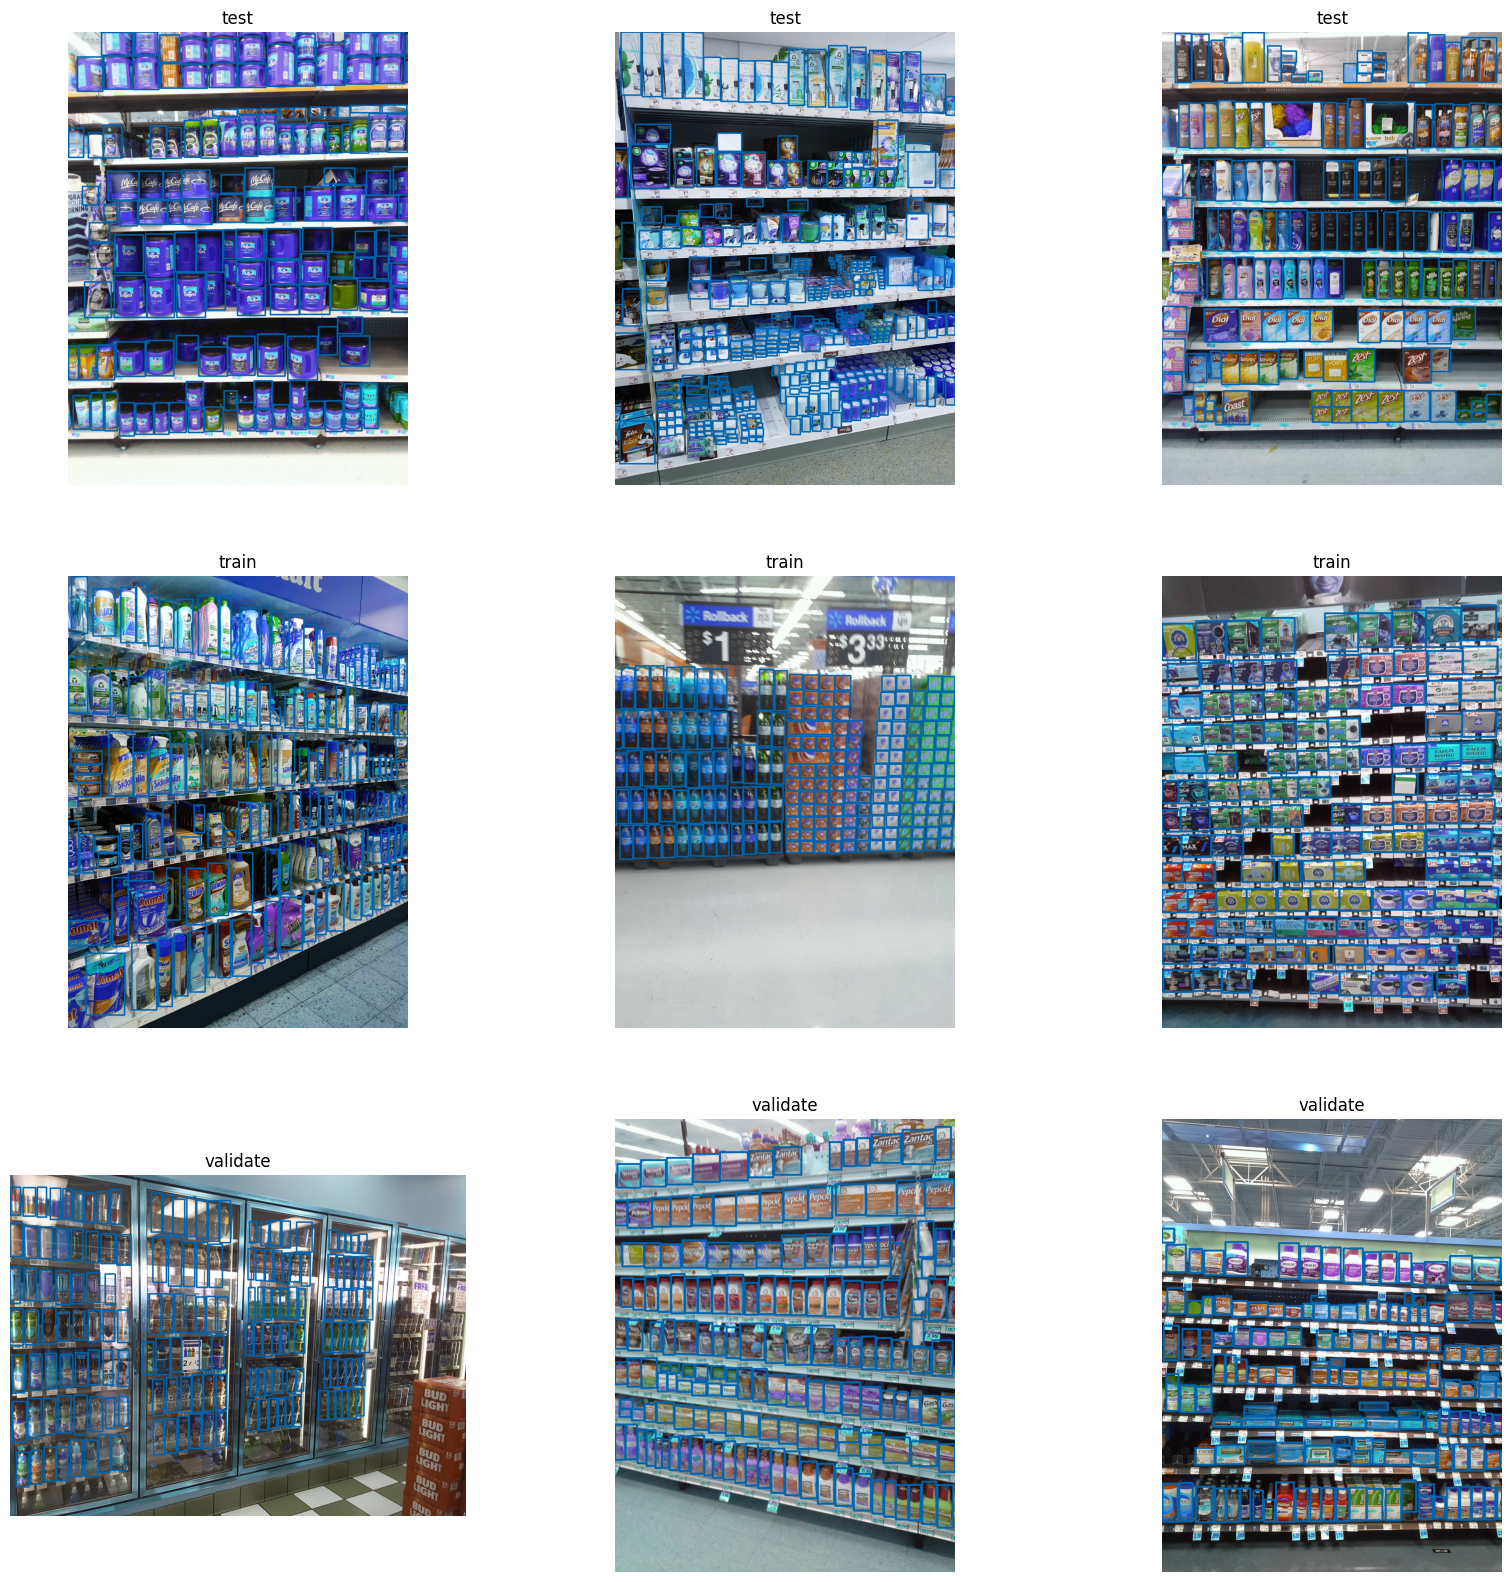

In [38]:
counter = 1
plt.figure(figsize=(20, 20), facecolor='white')

for prefix in prefix_types:
    local_files_images = glob.glob('SKU110k_Dataset\\SKU110K_fixed\\'+prefix + "\\*")
    for idx in random.sample(range(0, len(local_files_images)), 3):
        filename_image = local_files_images[idx]
        print(filename_image)

    
        
        Splitted_string=filename_image.split("\\")
        Imagename=Splitted_string[3].split(".")
        ImageType=Imagename[0].split("_")
        Imagename=Imagename[0]
        ImageType=ImageType[0]

        
        data=pd.DataFrame()
        if ImageType == 'test':
            data=test.loc[test[0] == Imagename+'.jpg']
        elif ImageType == 'train':
            data=train.loc[train[0] == Imagename+'.jpg']
        else:
            data=val.loc[val[0] == Imagename+'.jpg']
                      
        
        
        im = cv2.imread(filename_image)
        im_size = im.shape[:2]

        for _, bbox in data.iterrows():
            image_name,x1,y1,x2,y2,classifcation,image_width,image_height = bbox
            

            start_point = (int(x1), int(y1))
            end_point = (int(x2), int(y2))
            color = (0, 100, 175)
            thickness = 10

            im = cv2.rectangle(im, start_point, end_point, color, thickness)

        ax = plt.subplot(3, 3, counter)
        plt.title(prefix)
        plt.axis("off")
        plt.imshow(im)
        counter += 1

# MODEL TRAINING
### Data must be formatted differently to be used in YOLO
#### For the SKU110K dataset, the preparation and formating are handled in the notebook `convert_yolov5.ipynb` inside the respective [SKU110K repository on GitHub](https://github.com/datasith/ds-datasets-sku110k).

In [39]:
#GPU INFORMATION
!nvidia-smi

Fri May  5 00:21:49 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.29                 Driver Version: 531.29       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB   WDDM | 00000000:01:00.0  On |                  N/A |
|  0%   45C    P8                9W / 120W|   3420MiB /  6144MiB |     13%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Begin training model

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=25 imgsz=412 plots=True

e:\KAIMGRAUATIONPROJECT
^C


Ultralytics YOLOv8.0.20  Python-3.9.0 torch-2.0.0+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=412, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=

# Model validation on custom *local* images

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train15/weights/best.pt conf=0.25 source=E://KAIM GRAUATION PROJECT//Customtestdataset//Pictures//20230501_224004.mp4

e:\KAIM GRAUATION PROJECT


Traceback (most recent call last):
  File "c:\users\khalid\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\khalid\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\khalid\AppData\Local\Programs\Python\Python39\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "c:\users\khalid\appdata\local\programs\python\python39\lib\site-packages\ultralytics\yolo\cfg\__init__.py", line 212, in entrypoint
    raise argument_error(a)
SyntaxError: 'GRAUATION' is not a valid YOLO argument.

    YOLOv8 'yolo' CLI commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of [detect, segment, classify]
                MODE (required) is one of [train, val, predict, export]
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaul

        yolo copy-cfg
        yolo cfg

    Docs: https://docs.ultralytics.com/cli
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
    
Sentry is attempting to send 2 pending error messages
Waiting up to 2 seconds
Press Ctrl-Break to quit


# Path Constants

In [6]:
DatasetPath = "E:\\KAIMGRAUATIONPROJECT\\Tamimi_Danube_Datasets\\Danube\\Test\\"
Destination_Output = r'E:\KAIMGRAUATIONPROJECT\Results'
ModelPath="E:\\KAIMGRAUATIONPROJECT\\runs\\detect\\train16\\weights\\best.pt"

## Get file names

In [7]:
dirListing = os.listdir(DatasetPath)
editFiles = []
for item in dirListing:
    if ".jpg" in item:
        editFiles.append(item)
print (editFiles)

['20230506_142616.jpg']


# Initialize YOLO model

In [10]:
model = YOLO(ModelPath)
#detection_output = model.predict(source="E:\\KAIMGRAUATIONPROJECT\\Customtestdataset\\subset\\20230501_224822.jpg", conf=0.4, save=True)

# RUN


In [13]:
counter=389
for image in editFiles:
    #Make directory
    if not os.path.exists(Destination_Output+r"\Shelf_"+str(counter)):
        os.makedirs(Destination_Output+r"\Shelf_"+str(counter))
    #Run YOLO model
    detection_output = model.predict(source=DatasetPath+ '\\' +image, conf=0.1, save=True)
    
    #Interpret results
    result=detection_output[0]
    len(result.boxes)
    counter2=0
    for box in result.boxes:
        cords = box.xyxy[0].tolist()
        
    
  

        #Get topleft and bottom right coordinates                   
        x1 = cords[0]
        y1 = cords[1]
        x2 = cords[2]
        y2 = cords[3]
        
        #Crop image then save
        img = Image.open(DatasetPath + image) 
        img_res = img.crop((x1, y1, x2, y2)) 
        img_res.save("E:\\KAIMGRAUATIONPROJECT\\Results\\Shelf_"+str(counter)+"\\Train"+str(counter2)+".jpg")
        counter2+=1
    #Move to respective shelf folder
    dirListing = os.listdir("E:\\KAIMGRAUATIONPROJECT\\runs\\detect\\predict16")
    src_path = "E:\\KAIMGRAUATIONPROJECT\\runs\\detect\\predict16\\"+ dirListing[0]
    dst_path = Destination_Output+r"\Shelf_"+str(counter)
    shutil.move(src_path, dst_path)
    counter+=1

Results saved to runs\detect\predict16
